In [172]:
# 패키지 임포트
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import konlpy
from konlpy.tag import Okt

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [173]:
# 데이터 불러오기 
df = pd.read_csv('./홍대_맛집_리뷰_데이터_ver5.csv')

In [174]:
df.head(10)

,Unnamed: 0,name,average_rating,user,user_rating,comment,url,target
0,0,후계동,4.5,풀내음,5.0,NaN,https://place.map.kakao.com/1183957472,1
1,1,후계동,4.5,ㅇㅇ,5.0,❤️❤️❤️❤️❤️,https://place.map.kakao.com/1183957472,1
2,2,후계동,4.5,핑구,5.0,오래 해주세요🙏,https://place.map.kakao.com/1183957472,1
3,3,후계동,4.5,:ᴅ,3.0,웨이팅해서 먹을 맛은 아니에요… 닭보쌈은 보통이었고 비빔국수라고 해서 당연히 국물 ...,https://place.map.kakao.com/1183957472,0
4,4,후계동,4.5,Vin,5.0,와 여길 왜 이제알았죠! 너무맛있고 반찬 하나하나 다 맛있네요!! 자주 갈게요!,https://place.map.kakao.com/1183957472,1
5,5,후계동,4.5,손민영,5.0,오늘의 메뉴 너무 좋아요. 어쩜 갖가지 닭요리를 그렇게 잘하시죠?!! 이런 리뷰 잘...,https://place.map.kakao.com/1183957472,1
6,6,후계동,4.5,장슐랭가이드,1.0,여기서 밥먹고 둘다 장염걸림;;,https://place.map.kakao.com/1183957472,0
7,7,후계동,4.5,이우진,5.0,최애 식당진짜 다 맛있고 가격이 엄청 착함오늘의 메뉴라고 매일 새로운 메뉴가 준비되...,https://place.map.kakao.com/1183957472,1
8,8,후계동,4.5,정찰병,4.0,다음부터 사장님 김치볶음밥하지마세요. ㅠ ㅜ 라면만 하세요!하실꺼면 진짜 딴거말고 ...,https://place.map.kakao.com/1183957472,1
9,9,후계동,4.5,쿠집사,5.0,이렇게 맛있어도 되나 할 정도로 맛있어요ㅎㅎ,https://place.map.kakao.com/1183957472,1


In [175]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3130 entries, 0 to 3129
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      3130 non-null   int64  
 1   name            3130 non-null   object 
 2   average_rating  3130 non-null   float64
 3   user            3127 non-null   object 
 4   user_rating     3130 non-null   float64
 5   comment         2529 non-null   object 
 6   url             3130 non-null   object 
 7   target          3130 non-null   int64  
dtypes: float64(2), int64(2), object(4)
memory usage: 195.8+ KB


In [176]:
df.duplicated(['comment'])

0       False
1       False
2       False
3       False
4       False
        ...  
3125     True
3126     True
3127     True
3128     True
3129    False
Length: 3130, dtype: bool

In [177]:
df.drop_duplicates(['comment'])

,Unnamed: 0,name,average_rating,user,user_rating,comment,url,target
0,0,후계동,4.5,풀내음,5.0,NaN,https://place.map.kakao.com/1183957472,1
1,1,후계동,4.5,ㅇㅇ,5.0,❤️❤️❤️❤️❤️,https://place.map.kakao.com/1183957472,1
2,2,후계동,4.5,핑구,5.0,오래 해주세요🙏,https://place.map.kakao.com/1183957472,1
3,3,후계동,4.5,:ᴅ,3.0,웨이팅해서 먹을 맛은 아니에요… 닭보쌈은 보통이었고 비빔국수라고 해서 당연히 국물 ...,https://place.map.kakao.com/1183957472,0
4,4,후계동,4.5,Vin,5.0,와 여길 왜 이제알았죠! 너무맛있고 반찬 하나하나 다 맛있네요!! 자주 갈게요!,https://place.map.kakao.com/1183957472,1
...,...,...,...,...,...,...,...,...
3120,3120,혼가츠홍대,2.9,조에,5.0,음식이 가격대비 양도 많고 맛있는 곳입니다!!!분위기랑 직원들의 반응이 중요하신 분...,https://place.map.kakao.com/22895023,1
3122,3122,혼가츠홍대,2.9,maya,1.0,여기 알바들이 설쳐대는게 아니라면 방송 탔었다고 이리 리뷰가 많은것인가요? 진심 평...,https://place.map.kakao.com/22895023,0
3123,3123,혼가츠홍대,2.9,어쩜,2.0,음. 웨이팅 십오분했는데 차게 식은 치즈가스가 나왔다. 왕혼가츠도 그냥 쏘쏘.,https://place.map.kakao.com/22895023,0
3124,3124,혼가츠홍대,2.9,이정훈,5.0,가격은 양에비해서 싸거나 적당하다고 봅니다. 기본 생돈까스는 정말 양이 많슴니다.,https://place.map.kakao.com/22895023,1


<AxesSubplot:>

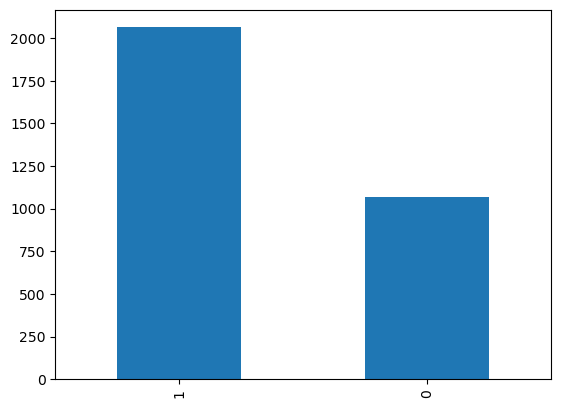

In [178]:
df['target'].value_counts().plot(kind = 'bar')

## 결측치 확인 및 제거

In [179]:
df.isnull().sum()

Unnamed: 0          0
name                0
average_rating      0
user                3
user_rating         0
comment           601
url                 0
target              0
dtype: int64

In [180]:
df = df.dropna()
df.isnull().sum()

Unnamed: 0        0
name              0
average_rating    0
user              0
user_rating       0
comment           0
url               0
target            0
dtype: int64

## 데이터 정제

In [181]:
df['comment'] = df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", '')

df.head(10)

/var/folders/m3/9rlp04l902592zqcywkn5ppm0000gn/T/ipykernel_41263/736958544.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['comment'] = df['comment'].str.replace("[^ㄱ-하-ㅣ가-힣 ]", '')


,Unnamed: 0,name,average_rating,user,user_rating,comment,url,target
1,1,후계동,4.5,ㅇㅇ,5.0,,https://place.map.kakao.com/1183957472,1
2,2,후계동,4.5,핑구,5.0,오래 해주세요,https://place.map.kakao.com/1183957472,1
3,3,후계동,4.5,:ᴅ,3.0,웨이팅해서 먹을 맛은 아니에요 닭보쌈은 보통이었고 비빔국수라고 해서 당연히 국물 없...,https://place.map.kakao.com/1183957472,0
4,4,후계동,4.5,Vin,5.0,와 여길 왜 이제알았죠 너무맛있고 반찬 하나하나 다 맛있네요 자주 갈게요,https://place.map.kakao.com/1183957472,1
5,5,후계동,4.5,손민영,5.0,오늘의 메뉴 너무 좋아요 어쩜 갖가지 닭요리를 그렇게 잘하시죠 이런 리뷰 잘 안 남...,https://place.map.kakao.com/1183957472,1
6,6,후계동,4.5,장슐랭가이드,1.0,여기서 밥먹고 둘다 장염걸림,https://place.map.kakao.com/1183957472,0
7,7,후계동,4.5,이우진,5.0,최애 식당진짜 다 맛있고 가격이 엄청 착함오늘의 메뉴라고 매일 새로운 메뉴가 준비되...,https://place.map.kakao.com/1183957472,1
8,8,후계동,4.5,정찰병,4.0,다음부터 사장님 김치볶음밥하지마세요 ㅠ ㅜ 라면만 하세요하실꺼면 진짜 딴거말고 김치...,https://place.map.kakao.com/1183957472,1
9,9,후계동,4.5,쿠집사,5.0,이렇게 맛있어도 되나 할 정도로 맛있어요ㅎㅎ,https://place.map.kakao.com/1183957472,1
10,10,후계동,4.5,Sungjin Ji,5.0,오늘의 메뉴닭 카레라이스미니 어묵 우동둘 다 맛있다 카레는 일본식 아니고 우리식 우...,https://place.map.kakao.com/1183957472,1


In [182]:
df['comment'] = df['comment'].replace('', np.nan)
len(df)

2527

In [183]:
df.isnull().sum()

Unnamed: 0        0
name              0
average_rating    0
user              0
user_rating       0
comment           5
url               0
target            0
dtype: int64

In [184]:
 # 정규표현식으로 인해 공백이 된 리뷰 행 제거
df = df.dropna()
len(df)

2522

In [185]:
df.head(10)

,Unnamed: 0,name,average_rating,user,user_rating,comment,url,target
2,2,후계동,4.5,핑구,5.0,오래 해주세요,https://place.map.kakao.com/1183957472,1
3,3,후계동,4.5,:ᴅ,3.0,웨이팅해서 먹을 맛은 아니에요 닭보쌈은 보통이었고 비빔국수라고 해서 당연히 국물 없...,https://place.map.kakao.com/1183957472,0
4,4,후계동,4.5,Vin,5.0,와 여길 왜 이제알았죠 너무맛있고 반찬 하나하나 다 맛있네요 자주 갈게요,https://place.map.kakao.com/1183957472,1
5,5,후계동,4.5,손민영,5.0,오늘의 메뉴 너무 좋아요 어쩜 갖가지 닭요리를 그렇게 잘하시죠 이런 리뷰 잘 안 남...,https://place.map.kakao.com/1183957472,1
6,6,후계동,4.5,장슐랭가이드,1.0,여기서 밥먹고 둘다 장염걸림,https://place.map.kakao.com/1183957472,0
7,7,후계동,4.5,이우진,5.0,최애 식당진짜 다 맛있고 가격이 엄청 착함오늘의 메뉴라고 매일 새로운 메뉴가 준비되...,https://place.map.kakao.com/1183957472,1
8,8,후계동,4.5,정찰병,4.0,다음부터 사장님 김치볶음밥하지마세요 ㅠ ㅜ 라면만 하세요하실꺼면 진짜 딴거말고 김치...,https://place.map.kakao.com/1183957472,1
9,9,후계동,4.5,쿠집사,5.0,이렇게 맛있어도 되나 할 정도로 맛있어요ㅎㅎ,https://place.map.kakao.com/1183957472,1
10,10,후계동,4.5,Sungjin Ji,5.0,오늘의 메뉴닭 카레라이스미니 어묵 우동둘 다 맛있다 카레는 일본식 아니고 우리식 우...,https://place.map.kakao.com/1183957472,1
11,11,후계동,4.5,손손,5.0,닭보쌈이 특히 예술 매일 해주시면 좋겠는데 오늘의메뉴여야 맛볼 수 있음,https://place.map.kakao.com/1183957472,1


## 토큰화 및 불용어 제거
* 불용어 사전 : '의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다'

In [186]:
stopwords =['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [187]:

okt = Okt()

morph_data = []
for sentence in df['comment']:
  temp_X = []
  temp_X = okt.morphs(sentence, stem=True) # 토큰화
  temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
  morph_data.append(temp_X)

In [188]:
morph_data[:10]

[['오래', '해주다'],
 ['웨이',
  '팅',
  '먹다',
  '맛',
  '아니다',
  '닭',
  '보쌈',
  '보통',
  '이다',
  '비빔국수',
  '라고',
  '당연하다',
  '국물',
  '없다',
  '줄',
  '알',
  '고',
  '시키다',
  '국물',
  '있다',
  '당황',
  '너무',
  '밍밍'],
 ['오다',
  '여기다',
  '왜',
  '이제',
  '알다',
  '너무',
  '맛있다',
  '반찬',
  '하나',
  '하나',
  '다',
  '맛있다',
  '자주',
  '갈다'],
 ['오늘',
  '메뉴',
  '너무',
  '좋다',
  '어쩜',
  '갖가지',
  '닭',
  '요리',
  '그렇게',
  '이렇다',
  '리뷰',
  '자다',
  '안',
  '남기다',
  '상수역',
  '근처',
  '제',
  '최애',
  '맛집',
  '이다',
  '사진',
  '태국',
  '식',
  '볶음밥',
  '이랑',
  '쌀국수',
  '나오다',
  '때',
  '예요'],
 ['여기', '서', '밥', '먹다', '두다', '장염', '걸리다'],
 ['최애',
  '식당',
  '진짜',
  '다',
  '맛있다',
  '가격',
  '엄청',
  '착하다',
  '오늘',
  '메뉴',
  '라고',
  '매일',
  '새롭다',
  '메뉴',
  '준비',
  '되다',
  '자주',
  '가도',
  '메뉴',
  '안질리다',
  '음식',
  '과일',
  '꼭',
  '나오다',
  '그것',
  '매일',
  '조금씩',
  '구성',
  '다르다'],
 ['다음',
  '부터',
  '사장',
  '님',
  '김치볶음밥',
  '말다',
  'ㅠ',
  'ㅜ',
  '라면',
  '만',
  '진짜',
  '따다',
  '김치',
  '랑',
  '밥',
  '만',
  '넣다',
  '해주다',
  '그게',
  '더',
  '맛있다',
 

In [189]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(morph_data)
#tokenizer.word_index
data = tokenizer.texts_to_sequences(morph_data)
data[:10]

[[314, 116],
 [48,
  49,
  2,
  3,
  16,
  488,
  1811,
  201,
  12,
  1812,
  249,
  726,
  43,
  9,
  134,
  315,
  42,
  72,
  43,
  4,
  853,
  7,
  674],
 [41, 229, 141, 418, 140, 7, 1, 675, 117, 117, 15, 1, 178, 88],
 [359,
  62,
  7,
  5,
  1813,
  3041,
  488,
  284,
  331,
  218,
  266,
  57,
  13,
  550,
  1814,
  323,
  87,
  489,
  50,
  12,
  392,
  3042,
  187,
  984,
  139,
  3043,
  19,
  34,
  393],
 [71, 106, 54, 2, 374, 3044, 332],
 [489,
  157,
  25,
  15,
  1,
  23,
  107,
  915,
  359,
  62,
  249,
  1179,
  634,
  62,
  1066,
  22,
  178,
  1067,
  62,
  3045,
  24,
  1180,
  168,
  19,
  727,
  1179,
  1531,
  676,
  310],
 [243,
  150,
  101,
  79,
  854,
  169,
  175,
  490,
  225,
  30,
  25,
  311,
  205,
  85,
  54,
  30,
  145,
  116,
  635,
  33,
  1,
  11],
 [299, 1, 22, 35, 18, 1, 154],
 [359,
  62,
  488,
  3046,
  1068,
  1069,
  37,
  520,
  15,
  1,
  108,
  151,
  187,
  16,
  677,
  187,
  37,
  1069,
  39,
  1815,
  1070,
  102,
  43,
  3,
  151,

In [190]:
# print('리뷰 최대 길이 : ', max(len(l) for l in data))
# print('리뷰 평균 길이 : ', sum(map(len, data))/len(data))
# plt.hist([len(s) for s in data], bins=50)
# plt.xlabel('length of Data')
# plt.ylabel('number of Data')
# plt.show()

## 낮은 빈도수의 단어 제거

In [191]:
# 3번미만는 제거해줌
threshold = 3
words_cnt = len(tokenizer.word_index)
rare_cnt = 0
words_freq = 0
rare_freq = 0

for key, value in tokenizer.word_counts.items():
    words_freq = words_freq + value

    if value < threshold:
        rare_cnt += 1
        rare_freq = rare_freq + value

print('전체 단어 수 : ', words_cnt)
print('빈도가 {} 이하인 희귀 단어 수: {}'.format(threshold-1, rare_cnt))
print('희귀 단어 비율 : {}'.format((rare_cnt / words_cnt)*100))
print('희귀 단어 등장 빈도율 : {}'.format((rare_freq / words_freq)*100))

전체 단어 수 :  5682
빈도가 2 이하인 희귀 단어 수: 3423
희귀 단어 비율 : 60.24287222808871
희귀 단어 등장 빈도율 : 7.940015487185298


In [192]:
vocab_size = words_cnt-rare_cnt + 2
vocab_size

2261

In [193]:
# tokenizer = Tokenizer(vocab_size, oov_token = 'OOV')
# tokenizer.fit_on_texts(morph_data)
# data = tokenizer.texts_to_sequences(morph_data)
# data

In [194]:
# drop_data = [index for index, sentence in enumerate(data) if len(sentence) < 1]

# data = np.delete(data, drop_data, axis = 0)
# len(data)

## 패딩
* 모델에 입력하기 위해선 모든 데이터의 길이가 동일해야함

In [195]:
print('리뷰 최대 길이 : ', max(len(l) for l in data))
print('리뷰 평균 길이 : ', sum(map(len, data))/len(data))


리뷰 최대 길이 :  573
리뷰 평균 길이 :  20.994052339413162


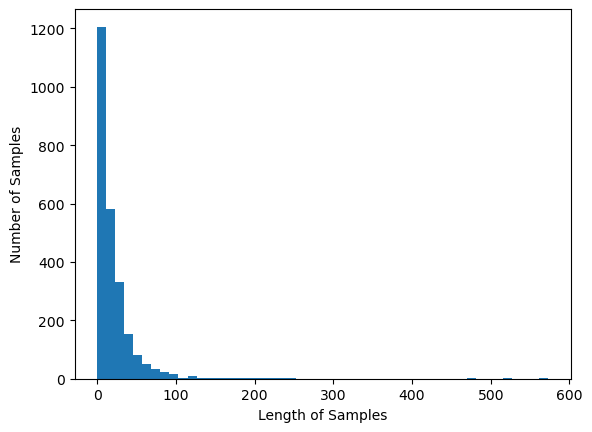

In [196]:
plt.hist([len(s) for s in data], bins =50)
plt.xlabel('Length of Samples')
plt.ylabel('Number of Samples')
plt.show()

* 최대 길이는 120으로 선택

In [197]:
max_len = 250

In [198]:
# data = pad_sequences(data, maxlen = max_len)
# data.shape

In [199]:
# data[:10]

## 원핫 인코딩

In [200]:
# import tensorflow as tf
# from tensorflow.keras.preprocessing.text import Tokenizer

In [201]:
# y = tf.keras.utils.to_categorical(df['target'])
# y[:10]

In [202]:
# df['target'].replace(0, 'bad', inplace = True)
# df['target'].replace(1, 'soso', inplace = True)
# df['target'].replace(2, 'good', inplace = True)

# df
# df['target']

## 학습 테스트 데이터 분리

In [203]:
from sklearn.model_selection import train_test_split

y = df['target']
x_train, x_test, y_train, y_test = train_test_split(data,y,test_size=0.30,random_state=2022)
# print(x_train.shape)
# print(x_test.shape)
y_train[:10]

/var/folders/m3/9rlp04l902592zqcywkn5ppm0000gn/T/ipykernel_41263/2846089119.py:7: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  y_train[:10]


328     1
234     1
511     1
799     1
15      1
1336    1
955     1
1646    1
1660    1
2919    1
Name: target, dtype: int64

## 모델링 및 학습
* LSTM 사용

In [1]:
from tensorflow.keras.layers import Embedding, Dense, LSTM, Bidirectional, GRU
from tensorflow.keras.models import Sequential

In [205]:
x_train = pad_sequences(x_train, maxlen=max_len)
x_test = pad_sequences(x_test, maxlen=max_len)

In [2]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(Bidirectional(LSTM(128)))
model.add(Dense(2, activation='softmax'))

model.compile(optimizer='rmsprop', loss='sparse_categorical_crossentropy', metrics=['acc'])
model.summary()
# model = Sequential()
# model.add(Embedding(vocab_size, 100))
# model.add(GRU(128))
# model.add(Dense(1, activation='sigmoid'))

# model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc'])
# model.summary()
# model = Sequential()
# model.add(Embedding(vocab_size, 128))
# model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
# model.add(Dense(1, activation='sigmoid'))
# model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

Metal device set to: Apple M1

systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



2022-11-28 22:01:44.837897: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2022-11-28 22:01:44.839303: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


NameError: name 'vocab_size' is not defined

In [207]:
history = model.fit(x_train, y_train, epochs=20, batch_size=10, validation_split=0.1)

Epoch 1/20


/opt/homebrew/anaconda3/envs/tf/lib/python3.9/site-packages/keras/engine/data_adapter.py:1699: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  return t[start:end]
2022-11-28 02:59:56.366056: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 02:59:57.075303: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 02:59:57.113249: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 02:59:58.579263: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin opt

159/159 [==============================] - ETA: 0s - loss: 0.5761 - acc: 0.7116

2022-11-28 03:00:41.793189: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 03:00:42.083844: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.
2022-11-28 03:00:42.130526: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


159/159 [==============================] - 53s 289ms/step - loss: 0.5761 - acc: 0.7116 - val_loss: 0.7390 - val_acc: 0.7514
Epoch 2/20
159/159 [==============================] - 37s 233ms/step - loss: 0.3881 - acc: 0.8262 - val_loss: 0.4187 - val_acc: 0.8023
Epoch 3/20
159/159 [==============================] - 40s 249ms/step - loss: 0.2852 - acc: 0.8822 - val_loss: 0.4013 - val_acc: 0.8192
Epoch 4/20
159/159 [==============================] - 46s 288ms/step - loss: 0.2413 - acc: 0.9037 - val_loss: 0.4794 - val_acc: 0.8249
Epoch 5/20
159/159 [==============================] - 36s 227ms/step - loss: 0.1959 - acc: 0.9288 - val_loss: 0.4521 - val_acc: 0.8305
Epoch 6/20
159/159 [==============================] - 38s 238ms/step - loss: 0.1700 - acc: 0.9332 - val_loss: 0.4794 - val_acc: 0.8249
Epoch 7/20
159/159 [==============================] - 39s 244ms/step - loss: 0.1452 - acc: 0.9421 - val_loss: 0.5322 - val_acc: 0.8079
Epoch 8/20
159/159 [==============================] - 33s 206ms/st

In [208]:
model.evaluate(x_test, y_test)

24/24 [==============================] - 5s 174ms/step - loss: 1.2402 - acc: 0.7781


[1.240211009979248, 0.7780713438987732]

## 시각화

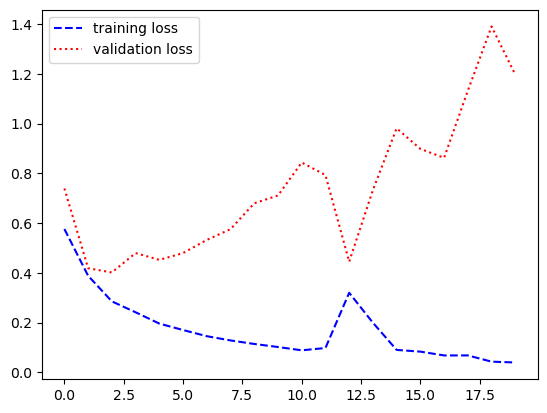

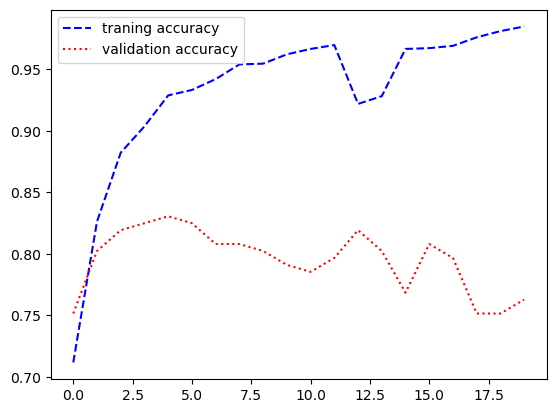

In [209]:
hist_dict = history.history
loss = hist_dict['loss']
val_loss = hist_dict['val_loss']
acc = hist_dict['acc']
val_acc = hist_dict['val_acc']

plt.plot(loss, 'b--', label='training loss')
plt.plot(val_loss, 'r:',label='validation loss')
plt.legend()

plt.figure()
plt.plot(acc, 'b--', label='traning accuracy')
plt.plot(val_acc, 'r:', label='validation accuracy')
plt.legend()

plt.show()

In [210]:
# def sentiment_predict(new_sentence):
#     new_token = [word for word in mecab.morphs(new_sentence) if not word in stopwords]
#     new_sequences = tokenizer.texts_to_sequences([new_token])
#     new_pad = pad_sequences(new_sequences, maxlen = max_len)
#     score = float(model.predict(new_pad))

#     if score > 0.5:
#         print('{}->긍정({:.2f}%)'.format(new_sentence, score*100))
#     else:
#         print('{}->부정({:.2f}%)'.format(new_sentence, (1-score)*100))

In [211]:
# sentiment_predict('음식도 맛없고 직원도 불친절해요')
# sentiment_predict('주방장님이 엄청 친절해요')
# sentiment_predict('서비스나 맛이 다 별로에요')
# sentiment_predict('우리 엄마가 해준 것보다 나은듯')
# sentiment_predict('여기 좀 심각합니다')
# sentiment_predict('양 실화냐')
# sentiment_predict('직원이 미친듯')
# sentiment_predict('하.. 그냥 할말이 없음 전체적으로 왜 그 모양인지 모르겠음')
# sentiment_predict('와 대박 부모님 모시고 싶은 맛')
# sentiment_predict('담에 또 와야지')
# sentiment_predict('나쁘지 않았음 다음 번에 가면 다른 메뉴 먹을 예정')
# sentiment_predict('진짜 쓰레기')
# sentiment_predict('개쓰레기 같은 맛 걍 장사 접어라')